### Aviation Data

Over the past few years , we as Drizzle plane company have been having a drop in profits and raise in losses especially due to the number of old planes within the company.


After careful consideration , I as the data analyst of the firm had to come up with a proposal especially affter careful consideration through the National Transportation Safety Board ,I was granted access to data containing the number of accidents new and technologized planes have undergone and in which parts of the country are affected by this.


Some of the reasons why this is good informattion is because most of the decision comes from careful analysation of the data provided. We may come up with different plane types to consider for purchase especially if we are planning to change the rate at which the company impacts the society.


Inorder for us to come up with a clear cosideration and proposal for the stakeholders ,we have to go through and visualize through the data provided. For this to start, we have to first load the data from the main source and clean it thourougly then finally ccome up with different visualizations that will aid in the passing of the proposal.

In [32]:
#Step 1 is loading the packages that will help in coming up with the proposal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now that we have loaded the packages to process the data given to us , we can now open the files and check the dataset structure for both

In [33]:
#We have loaded the first document (AviationData) as a dataset called df_aviationdata.
df_aviationdata = pd.read_csv('AviationData.csv',encoding = 'latin1',low_memory=False)
df_aviationdata.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


 Now that the dataset has been loaded into our working area , we can now check the validity and shape of the dataset to confirm its eligibility within the work environment

We can check the order at which the dataset is loaded using head() attribute and the shape() attribute to also confirm validity

In [34]:
# Now that we have both data structures well confirmed and verrified for continuation, we will proceed to data cleaning.
df_aviationdata.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## DATA UNDERSTANDING

To clearly understand what this data entails , we have to go through it step by step.First step is to check the type of data present in the dataset .

In [35]:
#checking the original shape of the aviation data dataset
df_aviationdata.shape


(88889, 31)

We also have to check the information provided in both datasets . We can do this in two different lines to understand the two.


In [36]:
df_aviationdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

Now that we have all information regarding the datasets , we can now move to copying the datasets and choosing specific columns to aid in our data presentation

## Data manipulation

In [37]:
#check columns present in df_aviation data and choose specific columns for manipulation
df_aviationdata.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [38]:
#copying the code to a different datset so as to avoid disturbing the original dataset
df2 = df_aviationdata.copy()

In [39]:
df2.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [63]:
df2.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Number.of.Engines',
       'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight',
       'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

In [40]:
#to clearly choose columns, we have already dropped the unwanted columns now we check for presence of any null values.
df2.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [64]:
#drop unrequired columns
df2.drop(['Latitude','Longitude','Airport.Code','Airport.Name','Registration.Number','FAR.Description','Broad.phase.of.flight','Report.Status','Number.of.Engines',
       'Engine.Type', 'Schedule', 'Purpose.of.flight',],axis = 1,inplace=True)

In [67]:
df2.drop('Air.carrier',axis =1,inplace=True)

In [68]:
#presence of null values in column make,model and even Amateur.Built
df2

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Unknown,Stinson,2.0,0.000000,0.000000,0.0,UNK,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Unknown,Piper,4.0,0.000000,0.000000,0.0,UNK,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Unknown,Cessna,3.0,0.279881,0.357061,NaN,IMC,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Unknown,Rockwell,2.0,0.000000,0.000000,0.0,IMC,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Unknown,Cessna,1.0,2.000000,0.357061,0.0,VMC,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,Unknown,PIPER,0.0,1.000000,0.000000,0.0,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,Unknown,BELLANCA,0.0,0.000000,0.000000,0.0,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,0.0,0.000000,0.000000,1.0,VMC,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,Unknown,CESSNA,0.0,0.000000,0.000000,0.0,NaN,NaN


In [69]:
#dropping the columns(due to them being already dropped an error keeps coming up)
df2.drop('Event.Id',axis=1,inplace =True)
df2

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Publication.Date
0,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Unknown,Stinson,2.0,0.000000,0.000000,0.0,UNK,NaN
1,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Unknown,Piper,4.0,0.000000,0.000000,0.0,UNK,19-09-1996
2,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Unknown,Cessna,3.0,0.279881,0.357061,NaN,IMC,26-02-2007
3,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Unknown,Rockwell,2.0,0.000000,0.000000,0.0,IMC,12-09-2000
4,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Unknown,Cessna,1.0,2.000000,0.357061,0.0,VMC,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,Unknown,PIPER,0.0,1.000000,0.000000,0.0,NaN,29-12-2022
88885,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,Unknown,BELLANCA,0.0,0.000000,0.000000,0.0,NaN,NaN
88886,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,0.0,0.000000,0.000000,1.0,VMC,27-12-2022
88887,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,Unknown,CESSNA,0.0,0.000000,0.000000,0.0,NaN,NaN


## Dropping of null values

After dropping the unwanted columns , we can now dwell deep in the data by going through all columns to ascertain that no null values are present

In [70]:
#now we can deal with the categorical null values using Aircraft.Category as the first column
df2['Aircraft.Category'].unique()

array(['Unknown', 'Airplane', 'Helicopter', 'Glider', 'Balloon',
       'Gyrocraft', 'Ultralight', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'UNK', 'ULTR'], dtype=object)

In [71]:
#after running the code below,we came to the understanding that there is no presence of any null values, so we can move to the next column
df2['Aircraft.Category'].isnull().sum()

0

In [72]:
df2['Aircraft.Category'].fillna('Unknown',inplace=True)
df2

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Publication.Date
0,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Unknown,Stinson,2.0,0.000000,0.000000,0.0,UNK,NaN
1,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Unknown,Piper,4.0,0.000000,0.000000,0.0,UNK,19-09-1996
2,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Unknown,Cessna,3.0,0.279881,0.357061,NaN,IMC,26-02-2007
3,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Unknown,Rockwell,2.0,0.000000,0.000000,0.0,IMC,12-09-2000
4,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Unknown,Cessna,1.0,2.000000,0.357061,0.0,VMC,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,Unknown,PIPER,0.0,1.000000,0.000000,0.0,NaN,29-12-2022
88885,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,Unknown,BELLANCA,0.0,0.000000,0.000000,0.0,NaN,NaN
88886,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,0.0,0.000000,0.000000,1.0,VMC,27-12-2022
88887,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,Unknown,CESSNA,0.0,0.000000,0.000000,0.0,NaN,NaN


In [73]:
#here we can check the null values for column make.
df2['Make'].unique()

array(['Stinson', 'Piper', 'Cessna', ..., 'JAMES R DERNOVSEK',
       'ORLICAN S R O', 'ROYSE RALPH L'], dtype=object)

In [74]:
df2.isnull().sum()

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category             0
Make                          0
Total.Fatal.Injuries      11401
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured            5912
Weather.Condition          4492
Publication.Date          13771
dtype: int64

After proper understanding, we have seen that the most affected columns have been dropped and the remaining we would just need to impute them.

## Imputing of null columns

Imputing would mean to properly change values present in a data column.This could be done through using of the mean mode value and even median value for numericals and for strings we would be required to fill in the values with a placeholder value for the data to work properly.

In [75]:
# We use this on column 'Total.Fatal.Injuries' and filling the values with the mode value of the column(most repeated).
df2['Total.Fatal.Injuries'].fillna(df2['Total.Fatal.Injuries'].mode(),inplace=True)

In [76]:
#checking the null values after using the attribute fillna
df2['Total.Fatal.Injuries'].isnull().sum()

11401

In [77]:
# We ccan use the mean value on the column 'Total.Serious.Injuries'
df2['Total.Serious.Injuries'].fillna(df2['Total.Serious.Injuries'].mean(),inplace=True)

In [78]:
#check for null values within the column
df2['Total.Serious.Injuries'].isnull().sum()

0

In [79]:
# We can use the median value to fill in null values in the column but because it contains numerical values we are required to use the mean value of the column.
df2['Total.Minor.Injuries'].fillna(df2['Total.Minor.Injuries'].mean(),inplace=True)

In [80]:
#check null values
df2['Total.Minor.Injuries'].isnull().sum()

0

In [81]:
df2.isnull().sum()

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category             0
Make                          0
Total.Fatal.Injuries      11401
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured            5912
Weather.Condition          4492
Publication.Date          13771
dtype: int64

After completing the imputations we still can see that some values are null and so we have to either decide if it will help us with our final product or if its better to work without the two columns. We can decide to drop one then remain with the other one (drop model tho remain with make)

In [94]:
df2.drop('Injury.Severity',axis=1,inplace = True)
df2

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Aircraft.damage,Aircraft.Category,Make,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Unknown,Stinson,2.0,0.000000,0.000000,0.0,UNK
1,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Unknown,Piper,4.0,0.000000,0.000000,0.0,UNK
2,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Destroyed,Unknown,Cessna,3.0,0.279881,0.357061,1.0,IMC
3,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Destroyed,Unknown,Rockwell,2.0,0.000000,0.000000,0.0,IMC
4,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Destroyed,Unknown,Cessna,1.0,2.000000,0.357061,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,Unknown,PIPER,0.0,1.000000,0.000000,0.0,Unknown
88885,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,Unknown,BELLANCA,0.0,0.000000,0.000000,0.0,Unknown
88886,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,0.0,0.000000,0.000000,1.0,VMC
88887,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,Unknown,CESSNA,0.0,0.000000,0.000000,0.0,Unknown


In [101]:
df2['Total.Fatal.Injuries'].fillna(df2['Total.Fatal.Injuries'].mean(),inplace=True)

In [102]:
df2['Total.Uninjured'].fillna(df2['Total.Uninjured'].median(),inplace=True)

In [103]:
df2['Weather.Condition'].fillna('Unknown',inplace=True)

In [104]:
# we can now fill the null values present in column 'Make' to obtain clear and complete data

In [105]:
df2['Make'].fillna('Unknown',axis=0,inplace=True)

In [106]:
df2

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Aircraft.damage,Aircraft.Category,Make,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Unknown,Stinson,2.0,0.000000,0.000000,0.0,UNK
1,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Unknown,Piper,4.0,0.000000,0.000000,0.0,UNK
2,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Destroyed,Unknown,Cessna,3.0,0.279881,0.357061,1.0,IMC
3,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Destroyed,Unknown,Rockwell,2.0,0.000000,0.000000,0.0,IMC
4,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Destroyed,Unknown,Cessna,1.0,2.000000,0.357061,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,Unknown,PIPER,0.0,1.000000,0.000000,0.0,Unknown
88885,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,Unknown,BELLANCA,0.0,0.000000,0.000000,0.0,Unknown
88886,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,0.0,0.000000,0.000000,1.0,VMC
88887,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,Unknown,CESSNA,0.0,0.000000,0.000000,0.0,Unknown


In [107]:
#check for any new null values
df2.isnull().sum()

Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                    52
Country                    226
Aircraft.damage           3194
Aircraft.Category            0
Make                         0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
dtype: int64

Now that we have cleared most of the null values in the dataset we can finally move to saving the new dataset as a new and cleaned dataset

In [108]:
#dropping the new unrequired fields for better data understanding 
df2.drop(['Aircraft.damage','Country'],axis = 1,inplace=True)

In [109]:
df2.columns

Index(['Investigation.Type', 'Accident.Number', 'Event.Date', 'Location',
       'Aircraft.Category', 'Make', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition'],
      dtype='object')

In [110]:
df2.shape

(88889, 11)

After clear understanding of the data , we can go ahead and save the dataset as the new dataset to work with

In [111]:
df2.to_csv('Aviation_Data.csv', index=True)

## Data visualization

Now we can come up with different scatter graphs to clearly understand the data provided for our presentation.


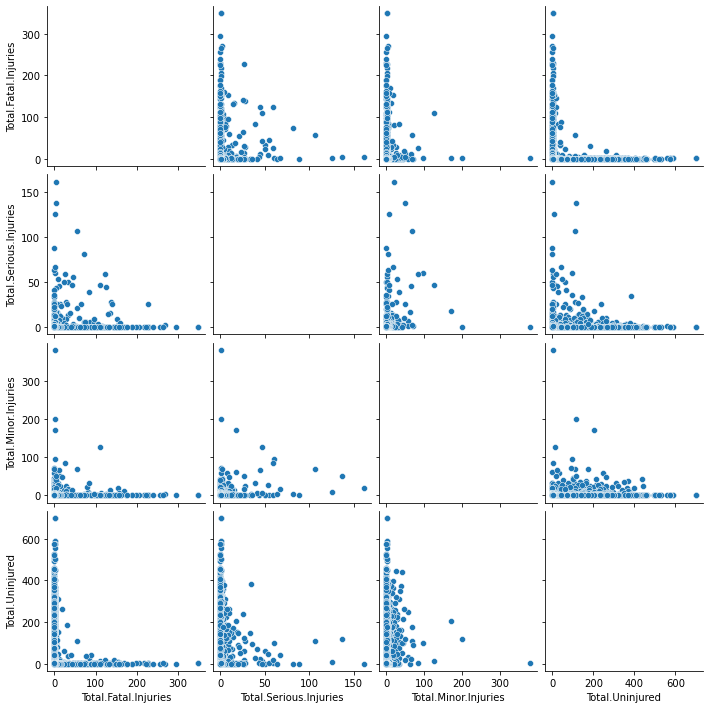

In [112]:
#we use sns scatter plots to come up with different graphs for the data at large.
sns.pairplot(df2)
plt.show()

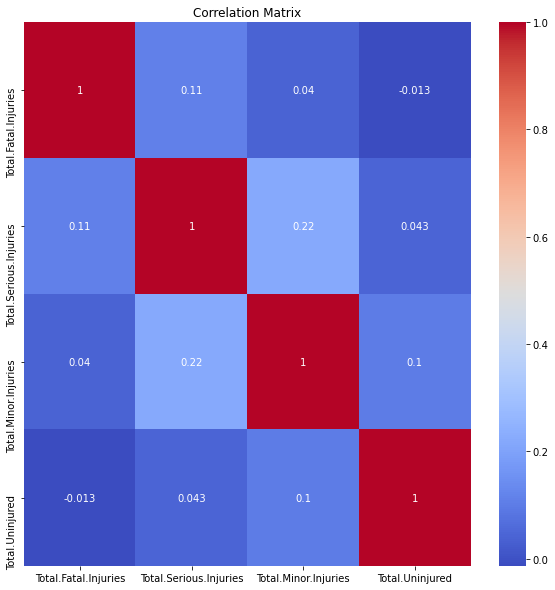

In [120]:
# here we can use the correlation to come up with a matrix(heatmap)describing the data .
df_corr  = df2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


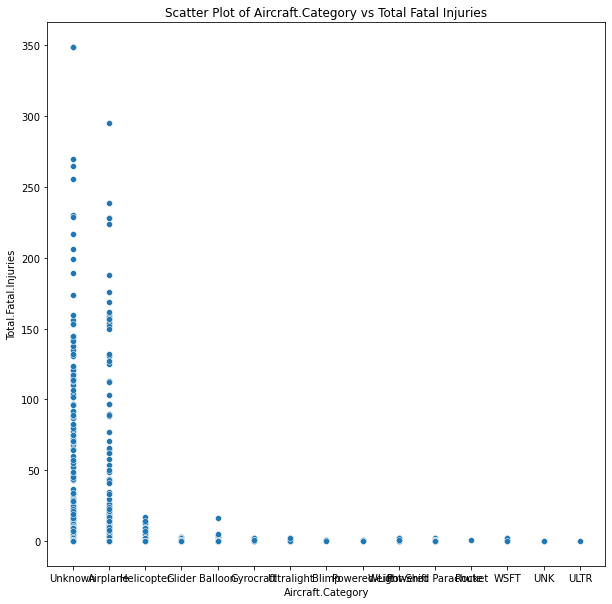

In [122]:
# here we use scatter plots to describe data between two variables within the data .
plt.figure(figsize=(10,10))
sns.scatterplot(x='Aircraft.Category', y='Total.Fatal.Injuries', data=df2)
plt.title('Scatter Plot of Aircraft.Category vs Total Fatal Injuries')
plt.show()
